In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib 

font = {'family' : 'sans-serif',
        'sans-serif':['Arial'],
        'weight' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)

colormap = {
        'all_peptides': '#457b9d', 
        'novel_peptides': '#e63946'
}


In [2]:
peptides_filename = '/Users/bj8th/Documents/Sheynkman-Lab/Data/JURKAT_06-06-2021/metamorpheus/pacbio/hybrid/search_results/Task1SearchTask/AllPeptides.jurkat.hybrid.psmtsv'
novel_peptides_filename = '/Users/bj8th/Downloads/Supplementary Table 4_v2.xlsx'

peptides = pd.read_table(peptides_filename)
target = peptides['Decoy/Contaminant/Target'] == 'T'
qval = peptides['QValue'] <= 0.01
peptides = peptides[target & qval]
novel_peptides = pd.read_excel(novel_peptides_filename, sheet_name='Jurkat novel peptide annotation')


In [3]:
print(f'min\t{novel_peptides["PEP score"].min()}')
print(f'max\t{novel_peptides["PEP score"].max()}')

min	2e-05
max	0.00414


## PEP Analysis

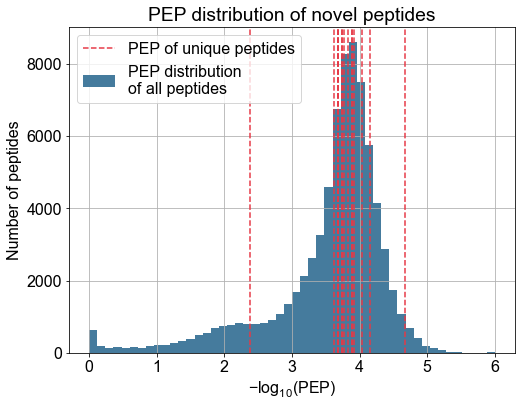

In [4]:
peptides['-log10(PEP)'] = -np.log10(peptides['PEP'] + 1e-6)
novel_peptides['-log10(PEP)'] = -np.log10(novel_peptides['PEP score'] + 1e-6)

params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
fig, ax = plt.subplots(figsize=(8,6))
peptides['-log10(PEP)'].hist(bins=50, ax=ax, color=colormap['all_peptides'], label='PEP distribution\nof all peptides')

for pep in novel_peptides['-log10(PEP)'].values:
    ax.axvline(x=pep, color=colormap['novel_peptides'], linestyle='dashed')
ax.axvline(x=pep, color=colormap['novel_peptides'], linestyle='dashed', label='PEP of unique peptides')
plt.legend(loc=0)
ax.set_ylabel('Number of peptides')
ax.set_xlabel('$-log_{10}(PEP)$')
ax.set_title('PEP distribution of novel peptides')

plt.savefig('./plots/novel_peptides.PEP_scores.pdf', bbox_inches='tight')

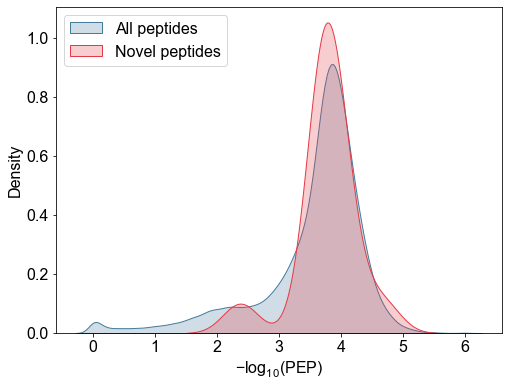

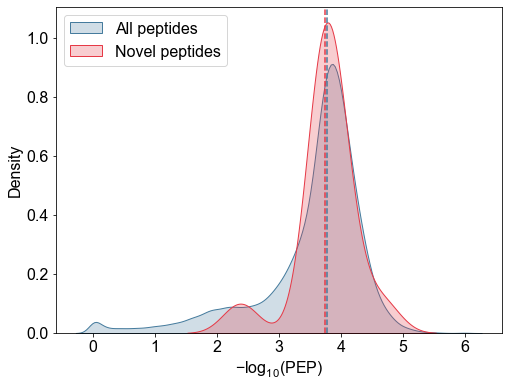

In [5]:
for is_with_median_line in [False, True]:
    median_text = '.median_line' if is_with_median_line else ''
    fig, ax = plt.subplots(figsize=(8,6))
    sns.kdeplot(data=peptides,x='-log10(PEP)', color=colormap['all_peptides'],  fill=True, ax=ax, label='All peptides')
    sns.kdeplot(data=novel_peptides, x='-log10(PEP)', color=colormap['novel_peptides'],fill=True, label='Novel peptides')
    if is_with_median_line:
        ax.axvline(x=peptides['-log10(PEP)'].median(), color=colormap['all_peptides'], linestyle='dashed')
        ax.axvline(x=novel_peptides['-log10(PEP)'].median(), color=colormap['novel_peptides'], linestyle='dashed')
    ax.set_ylabel('Density')
    ax.set_xlabel('$-log_{10}(PEP)$')
    plt.legend(loc=2)
    
    plt.savefig(f'./plots/novel_peptides.PEP_scores.KDE{median_text}.svg', bbox_inches='tight')

## FDR Analysis - Peptide

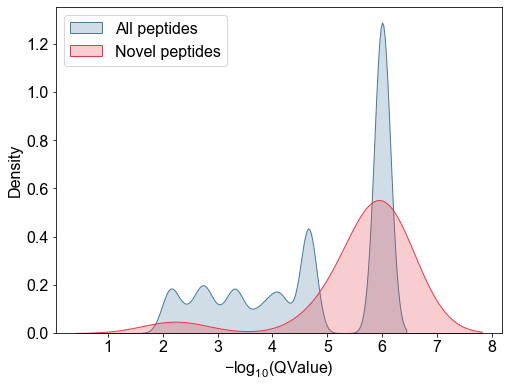

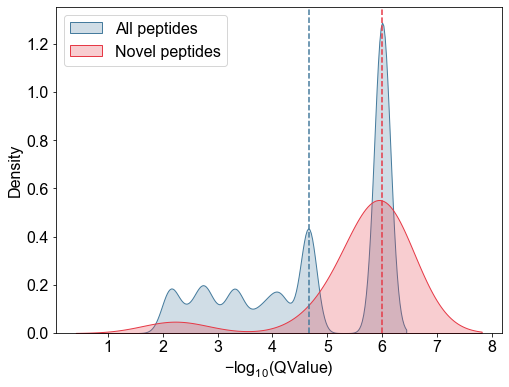

In [6]:
lowest_val = 1e-6
peptides['-log10(QValue)'] = -np.log10(peptides['QValue'] + lowest_val)
novel_peptides['-log10(QValue)'] = -np.log10(novel_peptides['Q-Value'] + lowest_val)

for is_with_median_line in [False, True]:
    median_text = '.median_line' if is_with_median_line else ''
    fig, ax = plt.subplots(figsize=(8,6))
    sns.kdeplot(data=peptides,x='-log10(QValue)', color=colormap['all_peptides'],  fill=True, ax=ax, label='All peptides')
    sns.kdeplot(data=novel_peptides, x='-log10(QValue)', color=colormap['novel_peptides'],fill=True, label='Novel peptides')
    if is_with_median_line:
        ax.axvline(x=peptides['-log10(QValue)'].median(), color=colormap['all_peptides'], linestyle='dashed')
        ax.axvline(x=novel_peptides['-log10(QValue)'].median(), color=colormap['novel_peptides'], linestyle='dashed')
    ax.set_ylabel('Density')
    ax.set_xlabel('$-log_{10}(QValue)$')
    plt.legend(loc=2)
    
    fig.savefig(f'./plots/novel_peptide.FDR.density{median_text}.svg')
    

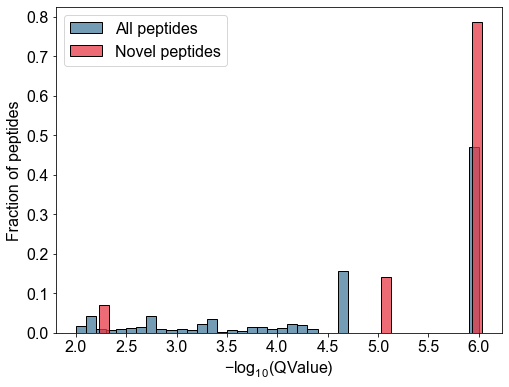

In [7]:



fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data=peptides,x='-log10(QValue)', color=colormap['all_peptides'],  fill=True, ax=ax, label='All peptides', stat='probability', binwidth=0.1)
sns.histplot(data=novel_peptides, x='-log10(QValue)', color=colormap['novel_peptides'],fill=True, label='Novel peptides', stat='probability', binwidth=0.1)

# ax.axvline(x=peptides['-log10(QValue)'].median(), color=colormap['all_peptides'])
# ax.axvline(x=novel_peptides['-log10(QValue)'].median(), color=colormap['novel_peptides'])
ax.set_ylabel('Fraction of peptides')
ax.set_xlabel('$-log_{10}(QValue)$')
plt.legend(loc=2)
fig.savefig('./plots/novel_peptide.FDR.hist.probability.pdf')

## FDR Analysis - PEP

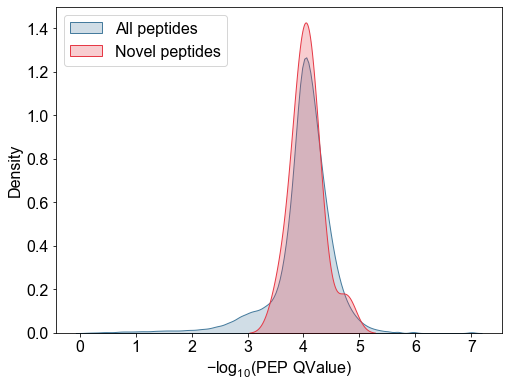

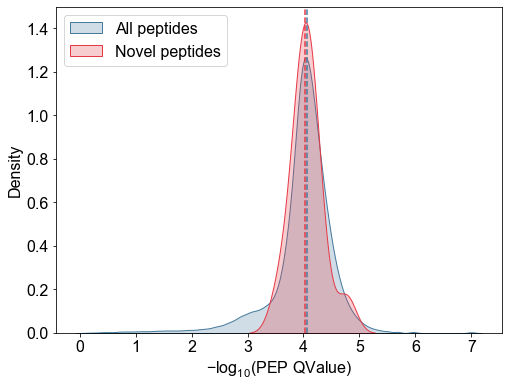

In [8]:
lowest_val = 1e-7
peptides['-log10(PEP QValue)'] = -np.log10(peptides['PEP_QValue'] + lowest_val)
novel_peptide_sequences = list(novel_peptides['Peptide sequence'])
mm_novel_peptides = peptides[peptides['Base Sequence'].isin(novel_peptide_sequences)]



for is_with_median_line in [False, True]:
    median_text = '.median_line' if is_with_median_line else ''

    fig, ax = plt.subplots(figsize=(8,6))
    sns.kdeplot(data=peptides,x='-log10(PEP QValue)', color=colormap['all_peptides'],  fill=True, ax=ax, label='All peptides')
    sns.kdeplot(data=mm_novel_peptides, x='-log10(PEP QValue)', color=colormap['novel_peptides'],fill=True, label='Novel peptides')
    if is_with_median_line:
        ax.axvline(x=peptides['-log10(PEP QValue)'].median(), color=colormap['all_peptides'], linestyle='dashed')
        ax.axvline(x=mm_novel_peptides['-log10(PEP QValue)'].median(), color=colormap['novel_peptides'], linestyle='dashed')
    ax.set_ylabel('Density')
    ax.set_xlabel('$-log_{10}(PEP\ QValue)$')
    plt.legend(loc=2)
    fig.savefig(f'./plots/novel_peptide.PEP_FDR.density{median_text}.pdf')




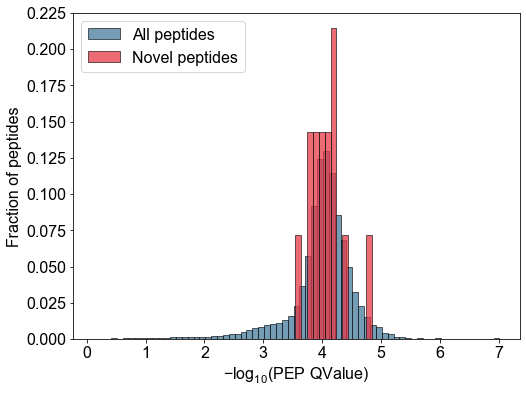

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data=peptides,x='-log10(PEP QValue)', color=colormap['all_peptides'],  fill=True, ax=ax, label='All peptides', stat='probability', binwidth=0.1)
sns.histplot(data=mm_novel_peptides, x='-log10(PEP QValue)', color=colormap['novel_peptides'],fill=True, label='Novel peptides', stat='probability', binwidth=0.1)

ax.set_ylabel('Fraction of peptides')
ax.set_xlabel('$-log_{10}(PEP\ QValue)$')
plt.legend(loc=2)
fig.savefig('./plots/novel_peptide.PEP_FDR.hist.probability.pdf')